# The Problem of two swords
`picture here`

---
### Intro

There are a lot of unanswered questions in the world:
- [P versus NP problem](https://en.wikipedia.org/wiki/P_versus_NP_problem)
- [Riemann hypothesis](https://en.wikipedia.org/wiki/Riemann_hypothesis)
- [Fermi paradox](https://en.wikipedia.org/wiki/Fermi_paradox)
- R or Python problem

But for some of us who play computer games, and especially [RPG](https://en.wikipedia.org/wiki/Role-playing_game), one of most difficult question is
- which sword is better either with damage 30-70 or 40-60?

For those who don't understand what I'm talking about, here is little explanation:  
Many people using their computers not only for programming or surfing internet but also for playing computer games. 
And in many of these games you have character in some world, habitted by enemies (some creatures). The main point of all these games is to kill enemies using various ways to kill them. Except the question why you should kill all the creatures in the game the rest is quite simple - enemy has a health points (HP) and you have damage that you can deal per hit. The damage you deal vary on sword (or other weapon) you have equiped. The question is - which sword will kill enemy faster either with damage uniformly distributed between 30-70 or 40-60?

And I'll try to answer this question.

---
### Little Story

The history of this note is very simple. One day I was sitting with my close friend in one of McKitchen eateries, and he asked me:  
**—** Which sword is better either 30-70 (damage per hit) or 40-60?  
I've start talking some shit about that 40-60 is more reliable and if creature has 40 HP you can definitely kill it with one hit but, he interruped me:  
**—** Yea, yea, sure, it depends on creature's HP, but what if it's infinite or just too big?  
**—** So then swords probably equal because you kill it with approximatly equal number of hits.  
**—** I'd also thought so, but when I done my calculations in [~~MATLAB~~](https://www.r-project.org) I found that 40-60 sword will kill a creature faster even if its HP is infinite!  
And my first reaction was something like O_O multiplied by 200

---
### Math problem

First of all we have to define what does it mean that one sword is better than another. And this is quite tricky question. At first glance we can say that better sword would kill creature (enemy) with less number of hits (in the meaning of expected average, of course) and that's all. But here we have to know creature's HP - since creature has 1HP we will kill it with one hit using any sword and here is no difference. So goodness of a sword depends on the world we habit.

So assume we have  
- random variable $\xi \in [a,b]$
- random variable $\xi' \in [c,d]$
- $\mathbb{E}\xi = \mathbb{E}\xi'$
- random variable $\eta$ so that $\sum_{i=1}^{\eta}\xi^i > h$
- random variable $\eta'$ so that $\sum_{i=1}^{\eta'}\xi'^i > h$

And we want to define inequality
$$\mathbb{E}\eta <> \mathbb{E}\eta'$$
for each $h$ (and we especially interested in $h \rightarrow \infty$).

**As a little disclaimer**: I understand that my solution is not complete and mathematically clear but I think it's quite interesting to present it.

## Monte Carlo simulation

As a physicist at heart and just a lazy guy first thing that I've done is very simple experiment.

- define HP number
- for defined HP run $10^6$ experiments of killing creature (no creatures were harmed during the experiments)
- for each sword we can found average number of hits
- plot difference in average number of hits

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%%time

n_experiments = 10**6
hp_array = np.arange(1000)
avg_hits_red = np.zeros(1000)
avg_hits_blue = np.zeros(1000)

red_attacks = []
blue_attacks = []

for hp in hp_array:
    n_hits_red = 0
    n_hits_blue = 0
    for i in range(n_experiments):
        hp_red = hp
        hp_blue = hp
        while hp_red > 0:
            if len(red_attacks) == 0:
                red_attacks = np.random.uniform(30, 70, 10**3).tolist()
            hp_red -= red_attacks.pop()
            n_hits_red += 1
        while hp_blue > 0:
            if len(blue_attacks) == 0:
                blue_attacks = np.random.uniform(40, 60, 10**3).tolist()
            hp_blue -= blue_attacks.pop()
            n_hits_blue += 1
    n_hits_red /= float(n_experiments)
    n_hits_blue /= float(n_experiments)
    avg_hits_red[hp]= n_hits_red
    avg_hits_blue[hp] = n_hits_blue

CPU times: user 5h 5min 19s, sys: 2min 22s, total: 5h 7min 41s
Wall time: 5h 16min 11s


Yea, it's pretty long :(  
Here is plot for average numbers of hits.

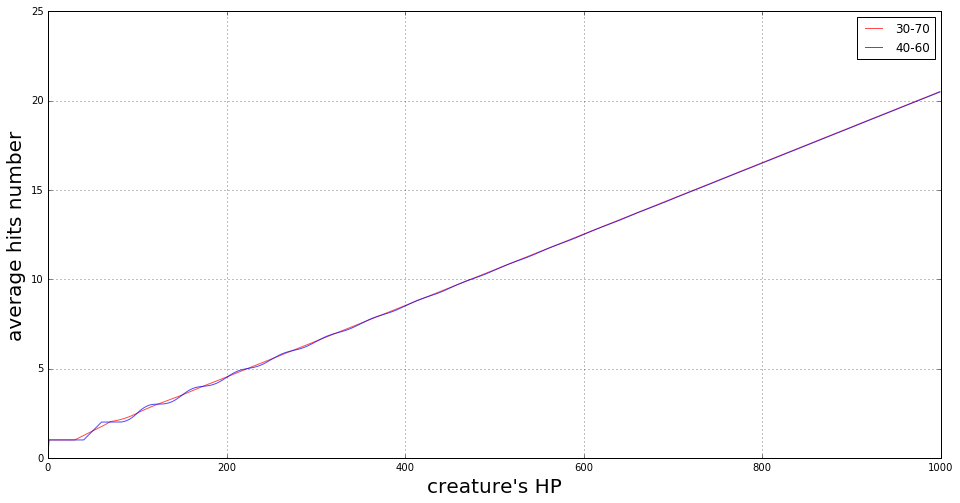

In [4]:
figsize(16,8)
plt.plot(hp_array, avg_hits_red, 'r', label='30-70', alpha=0.7)
plt.plot(hp_array, avg_hits_blue, 'b', label='40-60', alpha=0.7)
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('average hits number', size=20)
plt.legend()
plt.grid()

And here is more interesting plot.

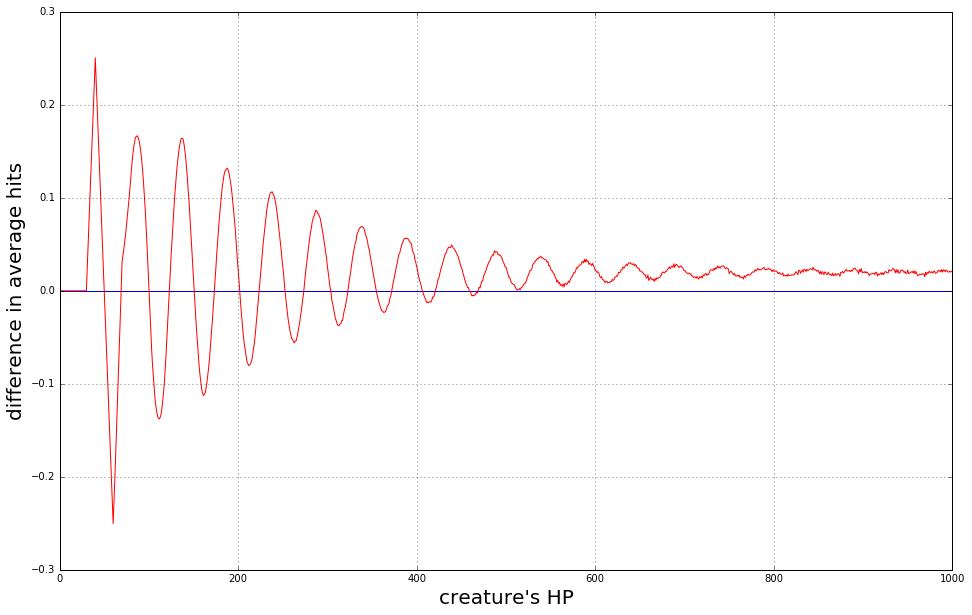

In [5]:
figsize(16,10)
plt.axhline(0.0)
plt.plot(hp_array, avg_hits_red - avg_hits_blue, 'r')
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

And that is an amazing plot! There is no difference until 30 HP, then it's fluctuating depends on HP (and 30-70 in some situations may be better) and finally not drops to zero but goes above on the asymptote. Here is a lot of things to investigate:
- zeros of the function
- parameters of the asymptote depends on damage distributions
- will it look so if we take other damage distribution than uniform

Also we have some noise here due to precision of calculations and number of experiments at each point.

Now we can defenitely say that 40-60 sword better than 30-70 at 1000HP. But what about bigger values? What about other parameters of damage distribution? Actually now everything is pretty clear - we have horizontal asymptote above the zero and also if we take other parameters of swords it will look similar. Although it is not strict proof it's something :)

To have more fun we have to run more experiments!  
And as always fun starts with Math!

## Calculus

Since Monte Carlo simulation is not the best way of calculations or at least very time consuming way (and I'm too lazy to wait so long) I've decided to make a formula for this function. So while code is running we will do some calculus.

- Assume we have $f(z)$ - PDF of random variable $\xi$ with finite support on $[a,b]$.  
- Define $\xi_n$ as sum of [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) - $\sum_{i=0}^n\xi^i$ and $f_n(z)$ - PDF of $\xi_n$.

First we derivate some useful formula. Write down convolution formula (it's well known and I won't write proof of it).
$$f_n(z) = \int_{a}^{b}f(y)f_{n-1}(z-y)dy$$

Then integrate both sides

$$\int_{an}^{x}f_n(z)dz = \int_{an}^x\int_{a}^{b}f(y)f_{n-1}(z-y)dydz$$

On the left side we have CDF of $\xi_n$ and on the right side we just can integrate over $z$

$$F_n(x) = \int_{a}^{b}f(y)F_{n-1}(x - y)dy - \int_{a}^{b}f(y)F_{n-1}(an - y)dy$$

We can notice that second summand on the right side equals to zero. It's pretty simple $(an-y)\in[an-b,an-a]$ but support of $F_{n-1}$ is $[an-a,\infty]$. Now we have some useful formula. Well, maybe not so useful at first view.

$$\int_{a}^{b}f(y)F_{n-1}(x - y)dy = F_n(x)$$

Lets find probability of $\xi_n > h$ (probability of killing creature with $h$ HP with $n$ hits).  
So first $n-1$ hits can produce damage in $[h-b, h)$ for us be able to kill creature in last hit.

$$P_n(h) = \int_{h-a}^{h}f_{n-1}(x)dx + \int_{h-b}^{h-a}f_{n-1}(x)\int_{h-x}^bf_{1}(y)dydx = $$

$$= F_{n-1}(h) - F_{n-1}(h - a) + F_{1}(b)\int_{h-b}^{h-a}f_{n-1}(x)dx - \int_{h-b}^{h-a}f_{n-1}(x)F_{1}(h-x)dx = $$

Integrating last summand by parts we get  

$$ = F_{n-1}(h) - F_{n-1}(h - a) + F_{1}(b)(F_{n-1}(h-b) - F_{n-1}(h-a)) - F_{n-1}(x)F_{1}(h-x)\Big|_{h-b}^{h-a} - \int_{h-b}^{h-a} f(h-x) F_{n-1}(x)dx$$

Now it is finest hour for our "useful" formula.

$$ P_n(h) = F_{n-1}(h) - F_{n-1}(h - a) + F_{1}(b)(F_{n-1}(h-b) - F_{n-1}(h-a)) - F_{n-1}(h - b)F_{1}(b) + F_{n-1}(h - a)F_{1}(a) - F_{n}(h)$$

$$P_n(h) = F_{n-1}(h) - F_{n}(h)$$

And as we got pretty simple and small equation for probability we can find average expectation of number of hits

$$m(h) = \sum_{n = 1}^{\infty} nP_n(h) = \sum_{n = 1}^{\infty} nF_{n-1}(h) - \sum_{n = 1}^{\infty} nF_{n}(h) = \sum_{n = 0}^{\infty} (n+1)F_{n}(h) - \sum_{n = 0}^{\infty} nF_{n}(h)$$

And finally we've got it!

$$m(h) = \sum_{n = 0}^{\infty} F_{n}(h)$$

Also it works not only for uniform distributions but for any distribution with finite positive support! Quite useful, i think.

## Calculations using CDF  
Now we have simple formula and can run more experiments and have more fun!

And we need formula for $F_n(h)$, and it's just a sum of uniformly distributed random variables known as [Irwin–Hall distribution](https://en.wikipedia.org/wiki/Irwin–Hall_distribution).

Quite simple function for CDF

In [14]:
def Irwin_Hall_CDF(x,n):
    if n == 0:
        return 0
    if x <= 0:
        return 0
    if x > n:
        return 1
    ans = 0
    for k in range(0, int(np.math.floor(x)) + 1):
        ans += (-1)**k*(x-k)**n/(np.math.factorial(k)*np.math.factorial(n-k))
    return ans

Also we should double the precision of our calculations

In [7]:
from decimal import *

Backup our MC calculations

In [8]:
mc_avg_hits_red = avg_hits_red
mc_avg_hits_blue = avg_hits_blue

Define the function that gives average hits as output just using alphabet as input

In [62]:
def calc_avg_hits(a,b,c,d,hp_array):
    avg_hits_red = np.zeros(len(hp_array))
    avg_hits_blue = np.zeros(len(hp_array))
    for i in range(len(hp_array)):
        hp = hp_array[i]
        # red
        min_hits = int(np.math.ceil(hp/Decimal(b)))
        max_hits = int(np.math.ceil(hp/Decimal(a)))
        expectation = 0
        for n_hits in range(max_hits + 1):
            probability = Irwin_Hall_CDF(Decimal(hp - a*(n_hits))/Decimal(b - a), n_hits)
            expectation += probability
        avg_hits_red[i] = expectation

        # blue
        min_hits = int(np.math.ceil(hp/Decimal(d)))
        max_hits = int(np.math.ceil(hp/Decimal(c)))
        expectation = 0
        for n_hits in range(max_hits + 1):
            probability = Irwin_Hall_CDF(Decimal(hp - c*(n_hits))/Decimal(d - c), n_hits)
            expectation += probability
        avg_hits_blue[i] = expectation
    return avg_hits_blue, avg_hits_red

In [49]:
%%time

hp_array = np.arange(10**3)
a = 30
b = 70
c = 40
d = 60

avg_hits_blue, avg_hits_red = calc_avg_hits(a,b,c,d,hp_array)

CPU times: user 19.4 s, sys: 311 ms, total: 19.7 s
Wall time: 20.3 s


And we have pretty time reduction: 5 hours -> 17 seconds. Math is a powerful thing though!

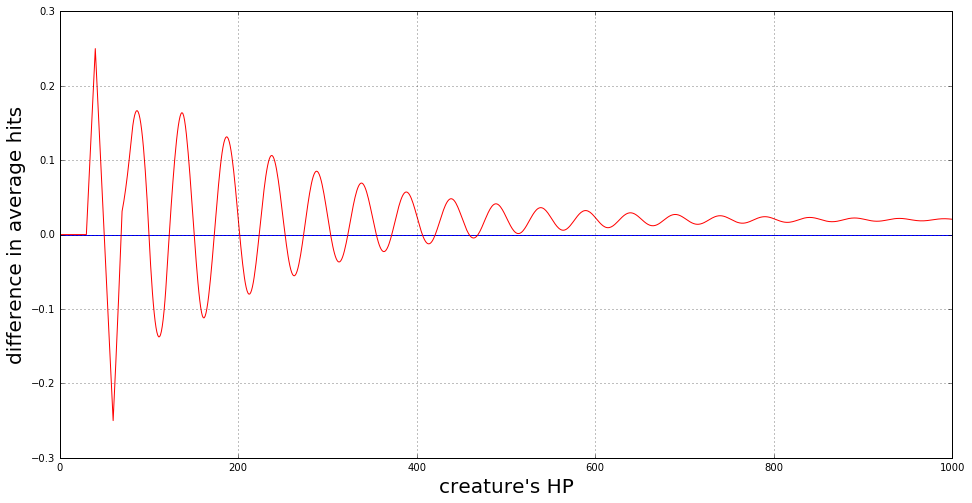

In [50]:
figsize(16,8)
plt.axhline(0.0)
plt.plot(hp_array, avg_hits_red - avg_hits_blue, 'r')
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

Now we get smooth curve, it looks pretty, but what about other parameter values or maybe bigger HP values?  
Start with bigger HP values

In [56]:
hp_array = np.arange(2*10**3)
a = 30
b = 70
c = 40
d = 60

avg_hits_blue, avg_hits_red = calc_avg_hits(a,b,c,d,hp_array)

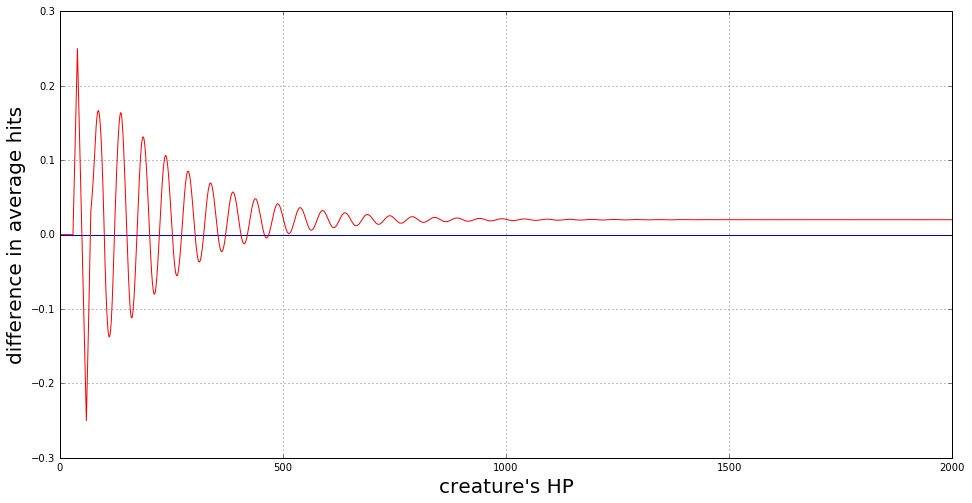

In [57]:
figsize(16,8)
plt.axhline(0.0)
plt.plot(hp_array, avg_hits_red - avg_hits_blue, 'r')
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

Let's look closer to last 500 values

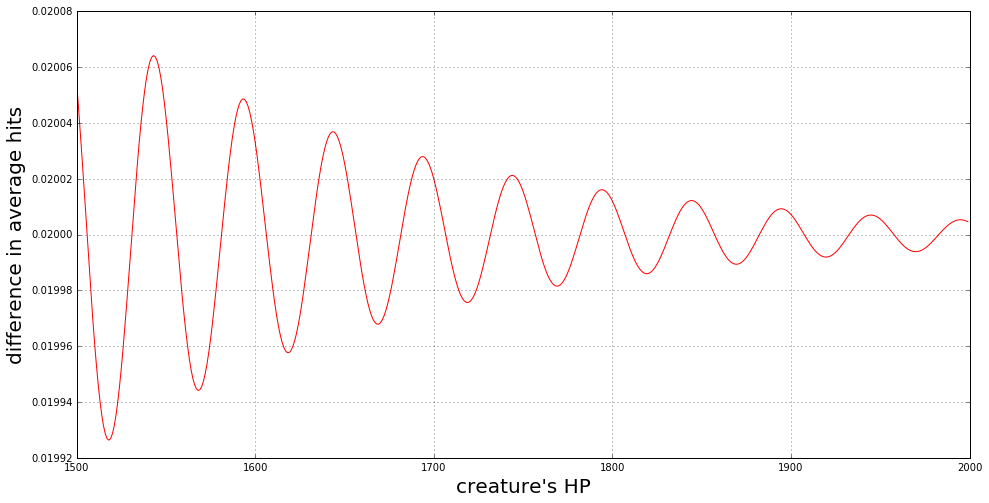

In [58]:
figsize(16,8)
plt.plot(hp_array[-500:], (avg_hits_red - avg_hits_blue)[-500:], 'r')
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

Quite interesting, isn't it? Fluctuations never ends! So actually it's not an asymptote.  
And what a magic constant 0.02?  

## Playing around

I'd made some attempts to derive formula on the paper but failed and then I've started my tries to guess the answer.  
**Interesting question** - how many points physicist usually need to guess an answer?

And the first assumption is that limit at $\infty$ depends on difference in variance.  
So if $\xi \in [40,60]$ and $\eta \in [30,70]$, then  
- $\mathbb{D}\xi = \frac{400}{12}$
- $\mathbb{D}\eta = \frac{1600}{12}$

Now substracting one from another we get $\frac{1200}{12} = 100$ and it's almost $0.02$... (if we devide $100$ by $5000$)  
But wait! Five thousand... hmmm... five thousand is $5000$ = $2\cdot2500$ = $2\cdot50^2$ = $2\cdot(\mathbb{E}\xi)^2$ = $2\cdot(\mathbb{E}\eta)^2$ Wow!  
And that is naturally cause dimensionality of $\mathbb{D}\xi$ is $\text{damage}^2$, but Y axis of our plot is average number of hits! So we have to devide our difference in variance by $\text{damage}^2$!

And now I remind you our problem  

---
We have  
- random variable $\xi \in [a,b]$
- random variable $\xi' \in [c,d]$
- $\mathbb{E}\xi = \mathbb{E}\xi'$
- random variable $\eta$ so that $\sum_{i=1}^{\eta}\xi^i > h$
- random variable $\eta'$ so that $\sum_{i=1}^{\eta'}\xi'^i > h$

And we want to define inequality $\mathbb{E}\eta <> \mathbb{E}\eta'$
for each $h$ (and we especially interested in $h \rightarrow \infty$).

---

And in this notation we have  
$$\lim_{h\rightarrow \infty} (\mathbb{E}\eta -\mathbb{E}\eta') = \frac{\mathbb{D}\xi - \mathbb{D}\xi'}{2(\mathbb{E}\xi)^2}$$

So in this case we need only one point to guess the formula, but nevertheless let's check it by several experiments.

Again we use Roman alphabet for our calculations

In [88]:
def magic_formula(a,b,c,d):
    return ((b-a)**2 - (d-c)**2)/(a+b)**2/6

In [86]:
hp_array = np.arange(1500, 2001)
a = 20.
b = 80.
c = 40.
d = 60.

avg_hits_blue, avg_hits_red = calc_avg_hits(a,b,c,d,hp_array)

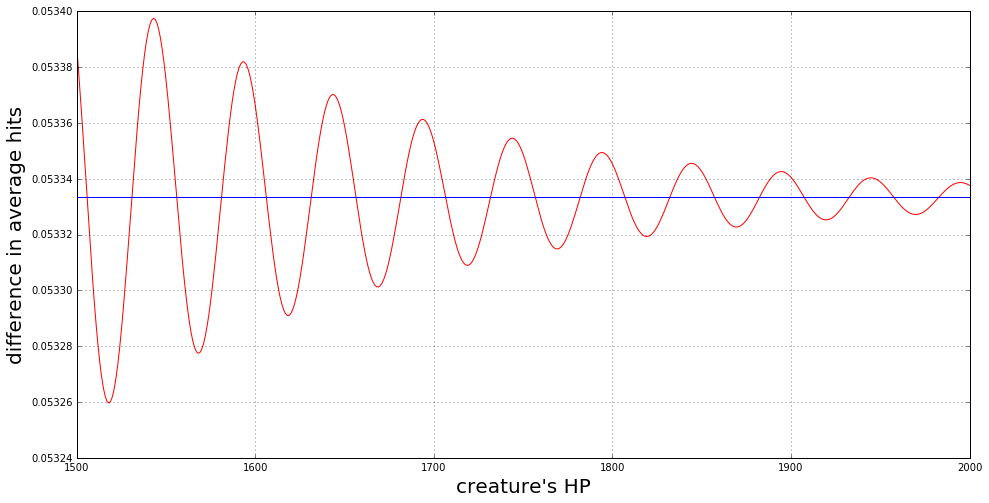

In [89]:
figsize(16,8)
plt.plot(hp_array, (avg_hits_red - avg_hits_blue), 'r')
plt.axhline(magic_formula(a,b,c,d))
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

Now let's take distribution with other mean

In [91]:
hp_array = np.arange(1500, 2001)
a = 20.
b = 100.
c = 40.
d = 80.

avg_hits_blue, avg_hits_red = calc_avg_hits(a,b,c,d,hp_array)

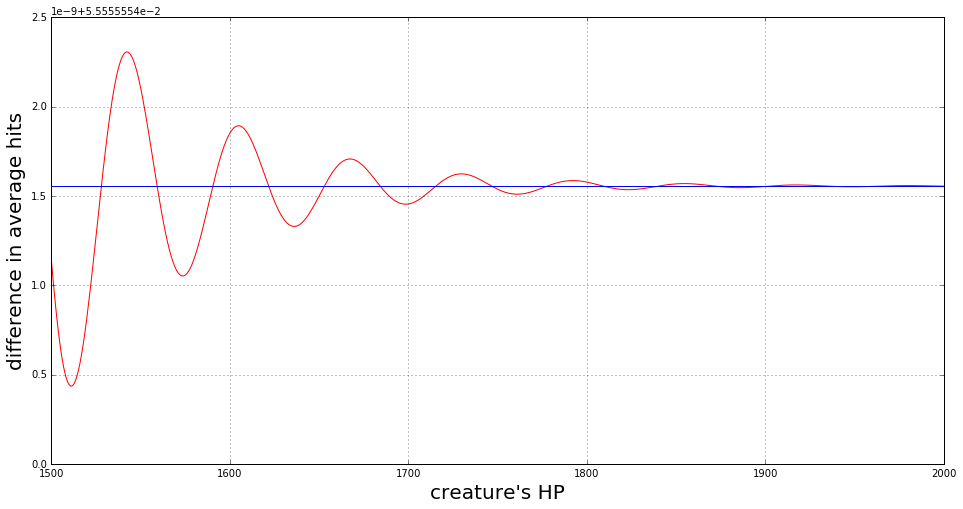

In [92]:
figsize(16,8)
plt.plot(hp_array, (avg_hits_red - avg_hits_blue), 'r')
plt.axhline(magic_formula(a,b,c,d))
plt.xlabel('creature\'s HP', size=20)
plt.ylabel('difference in average hits', size=20)
plt.grid()

Yea, looks perfect

And it looked like great discovery until I found this formula in the old book (books are very wise things though) - Renewal theory by Cox, Smith (Russian version of it you can find in my [repo](https://github.com/necludov/two-swords)). This formula is for average number of hits at infinite HP (I've discovered difference of the averages). And that's all.

<img src="formula.png">

P.S. Proof I've found in the same book several pages earlier.

## Conclusion

And the moral of this story is that reading books is very useful... just like vegetables.

And also i want to thank some guys for inspiration, help in calculus, spell checking and just for being cool guys:
- first guy
- second guy
- third guy